# INSTALACION DE PAQUETES

In [1]:
!pip3 install  pandas numpy matplotlib seaborn scipy imblearn requests tqdm scikit-learn umap-learn xgboost lightgbm

# CARGA DE LIBRERIAS

In [2]:
import database
import eda
import lgbm
import xgbm
import optuna
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# DESCARGA DE LOS DATOS

In [3]:
database.initialize_database()
cats = database.download_data()

# CARGA DATOS

In [4]:
database.upload_to_db(cats)

Todo listo. Base de datos en: /Users/pablogalvezbarron/Documents/GitHub/XGBOOST/database/quickdraw.db


# DESCARGA DE DATOS A DATAFRAME

In [5]:
df = database.get_dataframe()

# EDA

In [6]:
df

,id,category,data,recognized
0,1,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
1,2,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
2,3,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
3,4,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
4,5,dragon,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
...,...,...,...,...
24995,24996,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
24996,24997,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
24997,24998,diamond,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
24998,24999,diamond,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1


Transformamos el dataframe

In [7]:
df = eda.transform_dataframe(df)

Generadas 784 columnas de píxeles. Eliminando columna original 'data'...


In [8]:
eda.data_resume_info(df=df)

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 787 entries, id to px_783
dtypes: int64(2), object(1), uint8(784)
memory usage: 19.3+ MB

--- Valores Nulos ---
id            0
category      0
recognized    0
px_0          0
px_1          0
             ..
px_779        0
px_780        0
px_781        0
px_782        0
px_783        0
Length: 787, dtype: int64

--- Filas Duplicadas ---
Total: 0

--- Estadisticas Descriptivas ---


,id,category,recognized,px_0,px_1,px_2,px_3,px_4,px_5,px_6,...,px_774,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783
count,25000.000000,25000,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,...,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0,25000.0
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12500.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7217.022701,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6250.750000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,12500.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,18750.250000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


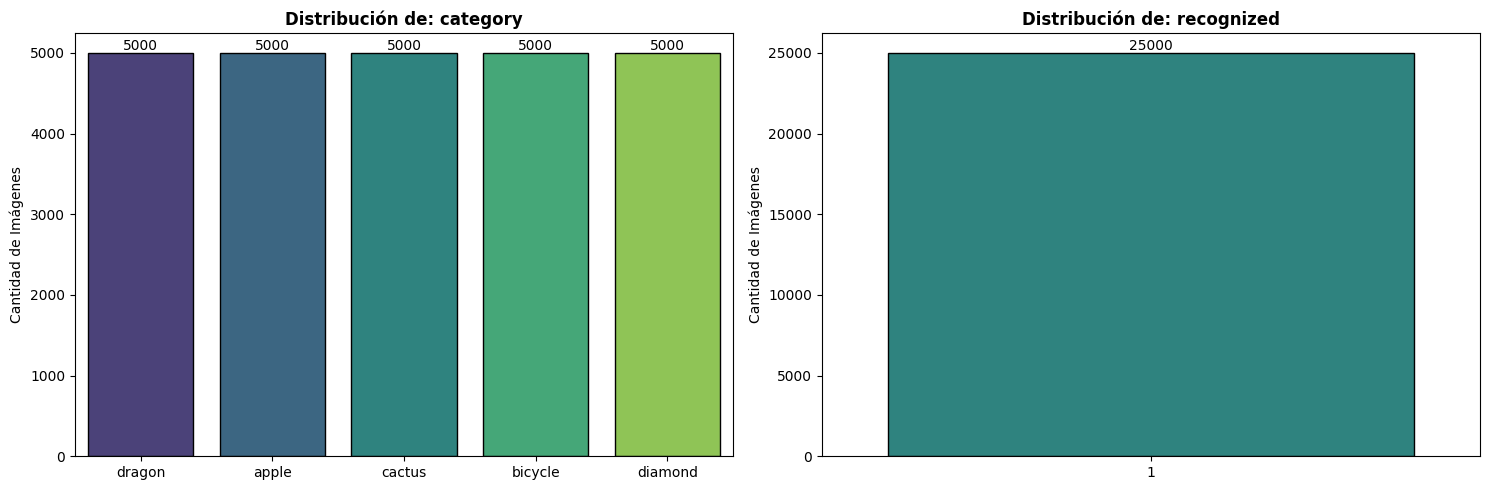

In [9]:
eda.plot_class_balance(df=df)

Umbral mínimo de tinta (q=0.01): 18921.92
Cantidad de dibujos sospechosos de estar vacíos: 250
Conteo de categorías en dibujos con poca tinta:
category
diamond    141
dragon      40
cactus      33
apple       25
bicycle     11
Name: count, dtype: int64

Distribución de 'recognized' en estos dibujos:
  - 1: 100.00%


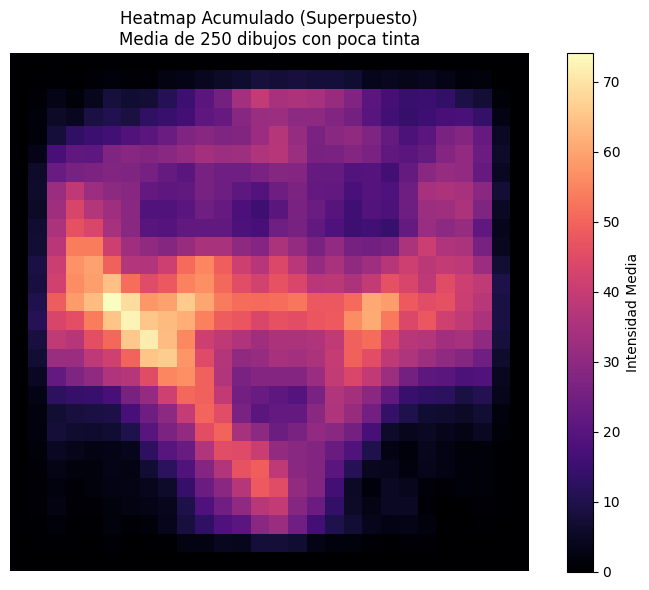


Mostrando revisión completa de los 250 dibujos seleccionados...


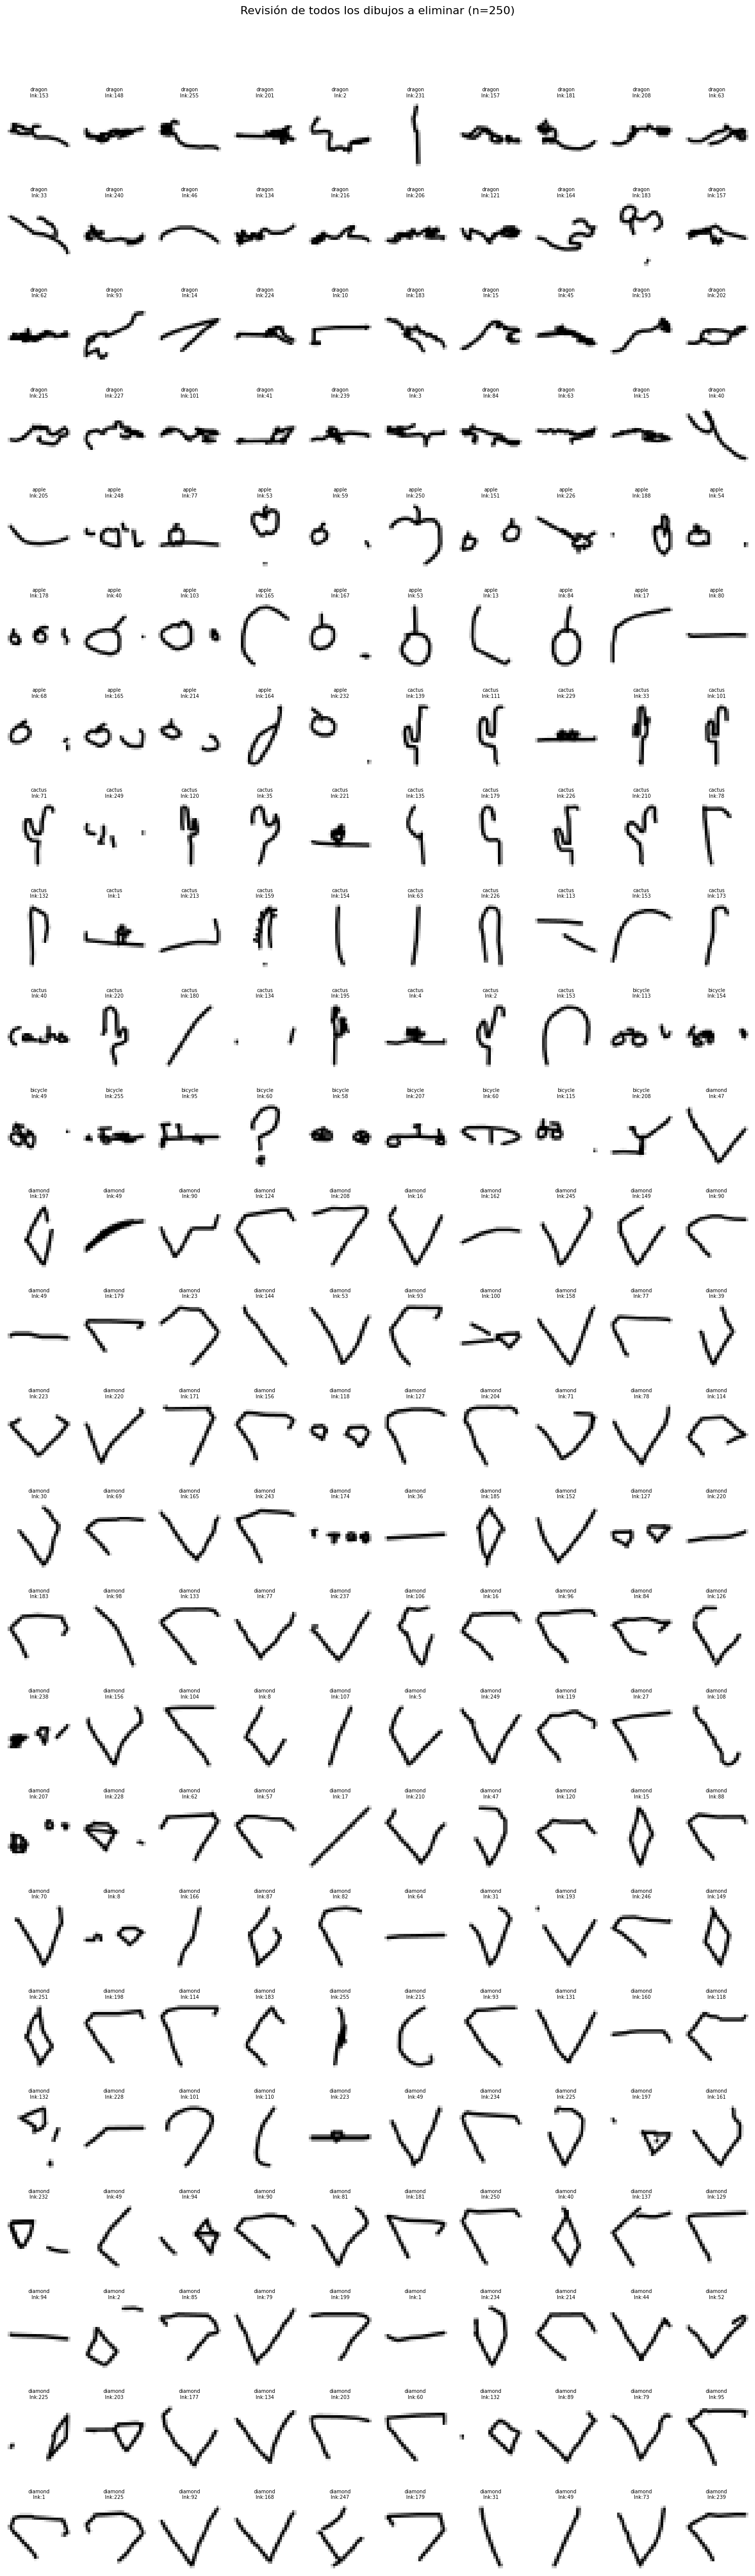

Eliminados 250 dibujos. Filas restantes: 24750


In [10]:
df = eda.drop_low_ink_drawings(df, quantile=0.01)

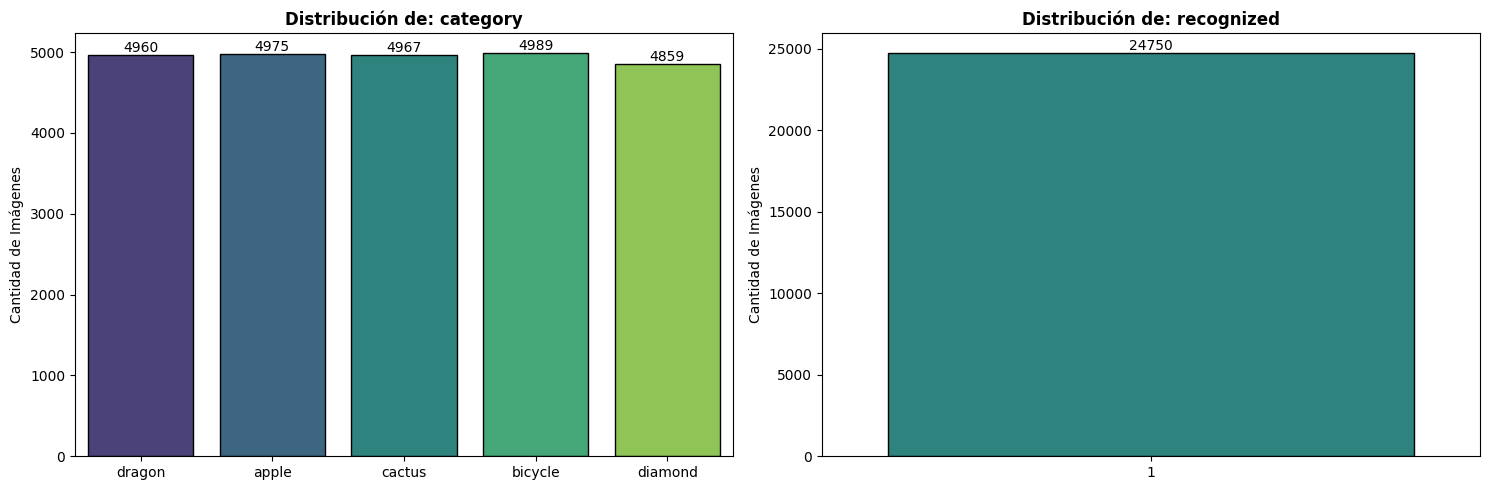

In [11]:
eda.plot_class_balance(df=df)

Encontramos que nuestro dataset se encuentra bastante balanceado, donde se garantiza que nuestras dos categorias de entrenamiento cuentan con la misma dimensionalidad. En caso de que haya una categoria con menor cantidad toca buscar metodologias de balanceo como SMOTE y undersampling, o en su defecto aplicar un poco de data augmentation para mejorar.

Generando imágenes promedio para 5 categorías...


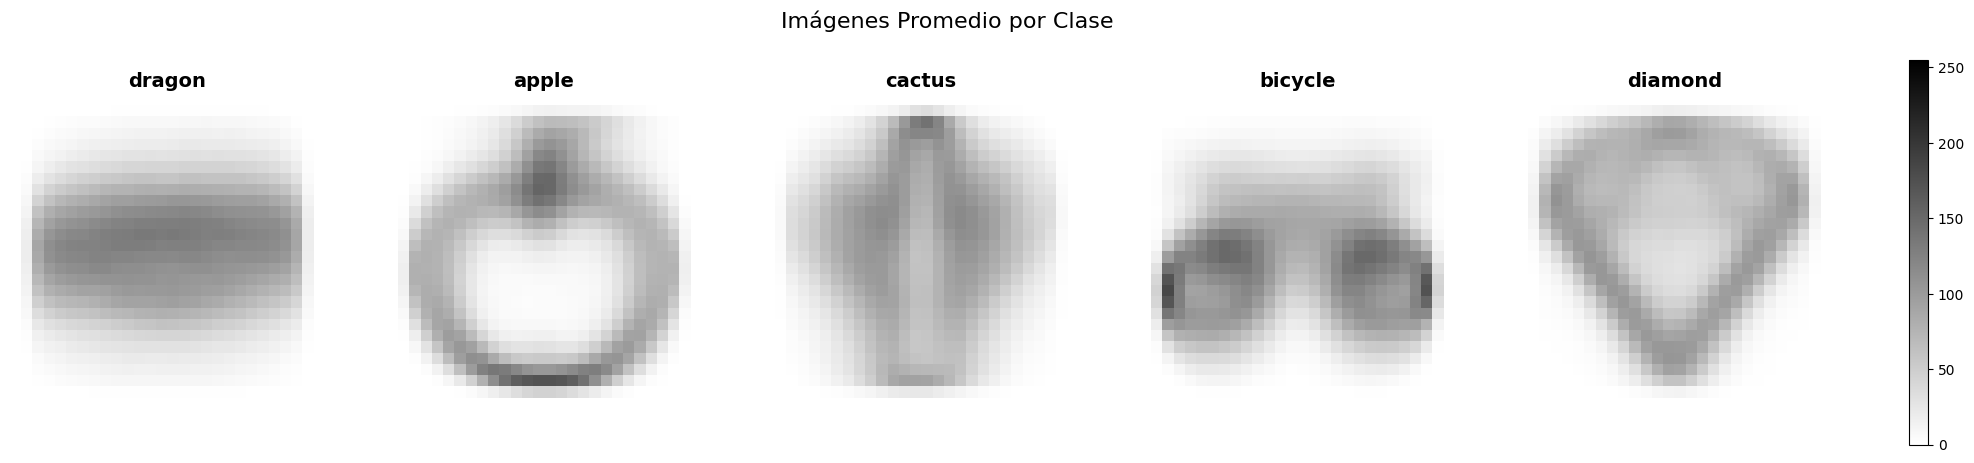

In [12]:
eda.plot_average_images(df=df)

sobre pone todas las imagenes que tengamos de la categoria e identifica de manera visual que tanto se parecen. Para el caso del dragon tenemos una sola nube gris, lo que implica que es una imagen compleja donde la interpretabilidad de individuo hace que la imagen cuenta con una alta varianza espacial es decir tenemos que generar un centrado por centro de masa
Para los otros casos se observa que siguen formas similares y tenemos una gran concentración de tinta en las partes caracteristicas de la imagen

Calculando complejidad (suma de intensidades)...


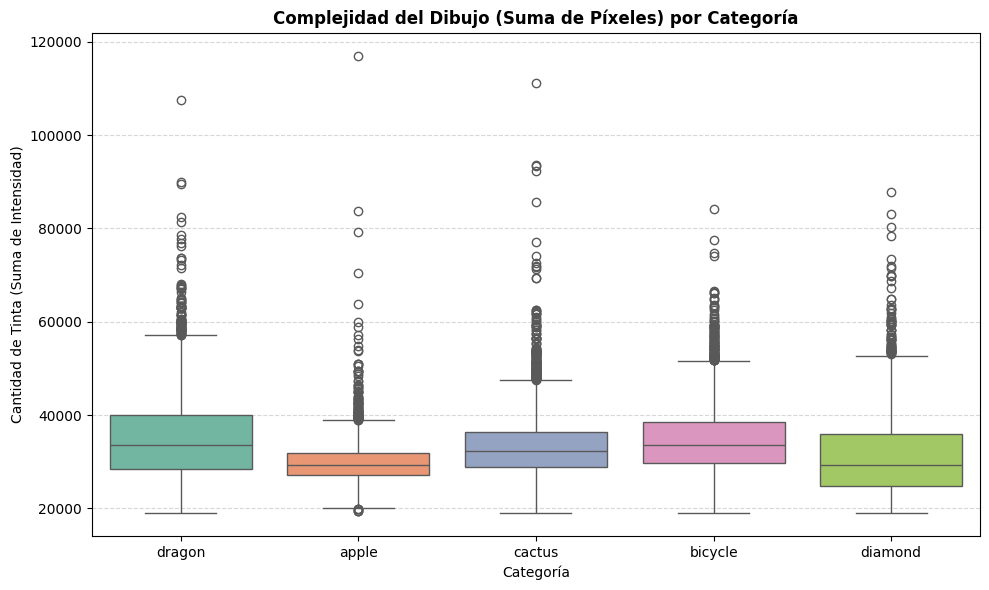

--- Estadísticas de Complejidad ---
                  mean          std      min      50%       max
category                                                       
apple     29670.033166  4401.219873  19486.0  29263.0  117009.0
bicycle   34684.691922  7084.892815  19046.0  33666.0   84230.0
cactus    33278.107107  6711.482888  19066.0  32222.0  111157.0
diamond   31045.921177  8375.031632  18922.0  29238.0   87777.0
dragon    34903.531855  8923.063118  18957.0  33496.5  107570.0


In [13]:
eda.analyze_complexity(df=df)

observando la imagen podemos decir que definitivamente dragon tiene una mayor varianza, es decir una cantidad mayor de diferentes dibujos. Adicional encontramos que tenemos pixeles outlier, quiere decir, gente que dibujo usando mucha titna o poca. Para el caso de dragon observamos que se usa mucha más cantidad de tinta lo que quiere decir más cocnentración en los detalles del dibujo. Manzana tiene una cantidad superior de outliers por debajo del bigote inferior lo que quiere decir que hay más dibujos incompletos o lineas sueltas en el dibujo. Las imagenes tiene una diferencia significativa en sus medias, pero tenemos que se solapan, eso quiere decir, que si se tiene una imagen con una cantidad de tinta similar a la parte en la que se encuentran los boxplot al modelo le sería dificil distinguir los dos grupos.

In [14]:
eda.test_complexity_significance(df=df)

Calculando complejidad sobre 784 píxeles para el test...

--- Resultado ANOVA (Diferencia de Medias en Cantidad de Tinta) ---
Estadístico F: 494.28
P-valor: 0.0000e+00


Con ANOVA confirmamos un Pvalor <0.05 lo que nos indica que rechazamos la hipotesis nula y decimos que por lo menos una de las media de concentración de tinta de nuestros grupos es diferente, lo que nos indica que no tenemos ningun dibujo que tenga en promedio la misma concentración de tinta que los otros grupos

Centramos las imagenes a partir de su centro de masa

Centrando 24750 imágenes. Esto puede tomar unos momentos...
Proceso finalizado.
Generando imágenes promedio para 5 categorías...


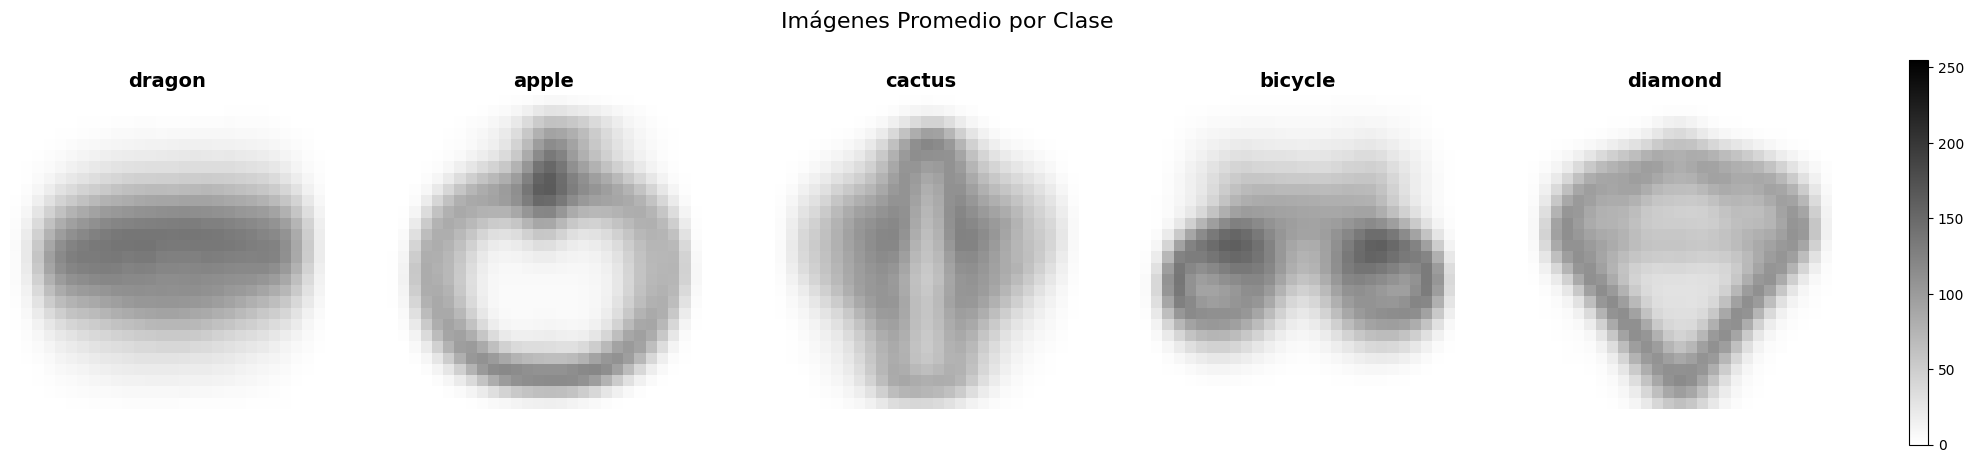

In [15]:
df_centered = eda.preprocess_center_images(df=df)
eda.plot_average_images(df=df_centered)

Calculando complejidad (suma de intensidades)...


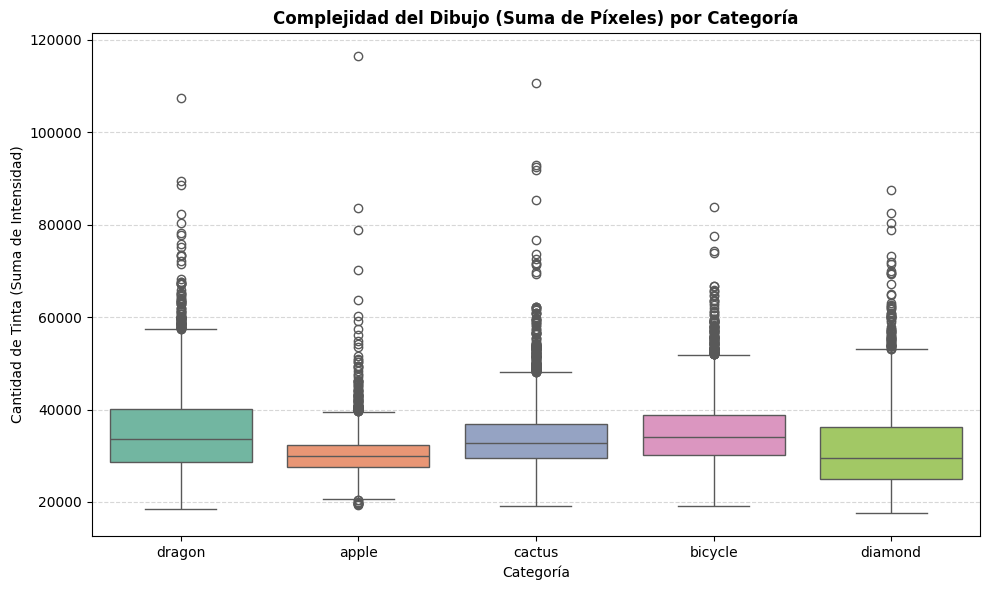

--- Estadísticas de Complejidad ---
                  mean          std      min      50%       max
category                                                       
apple     30225.733467  4397.677034  19431.0  29851.0  116557.0
bicycle   35053.377430  7058.593258  19068.0  34117.0   83895.0
cactus    33729.857862  6670.492790  19159.0  32767.0  110645.0
diamond   31304.110517  8325.292452  17534.0  29445.0   87538.0
dragon    35072.120968  8931.658004  18535.0  33684.0  107299.0


In [16]:
eda.analyze_complexity(df=df_centered)

Calculando varianza para 784 píxeles...


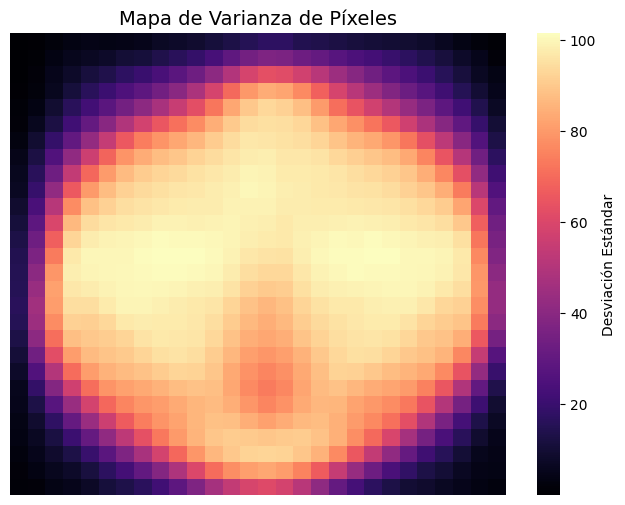

In [17]:
eda.plot_pixel_variance_heatmap(df=df_centered)

In [18]:
df_clean = eda.remove_low_variance_pixels(df, threshold=0)

Análisis de reducción de dimensionalidad (Threshold=0)...
Columnas iniciales: 784
Columnas finales: 676


In [19]:
df_clean.shape

(24750, 679)

Usando una muestra de 500 imágenes para UMAP...
Ejecutando UMAP en 500 imágenes...


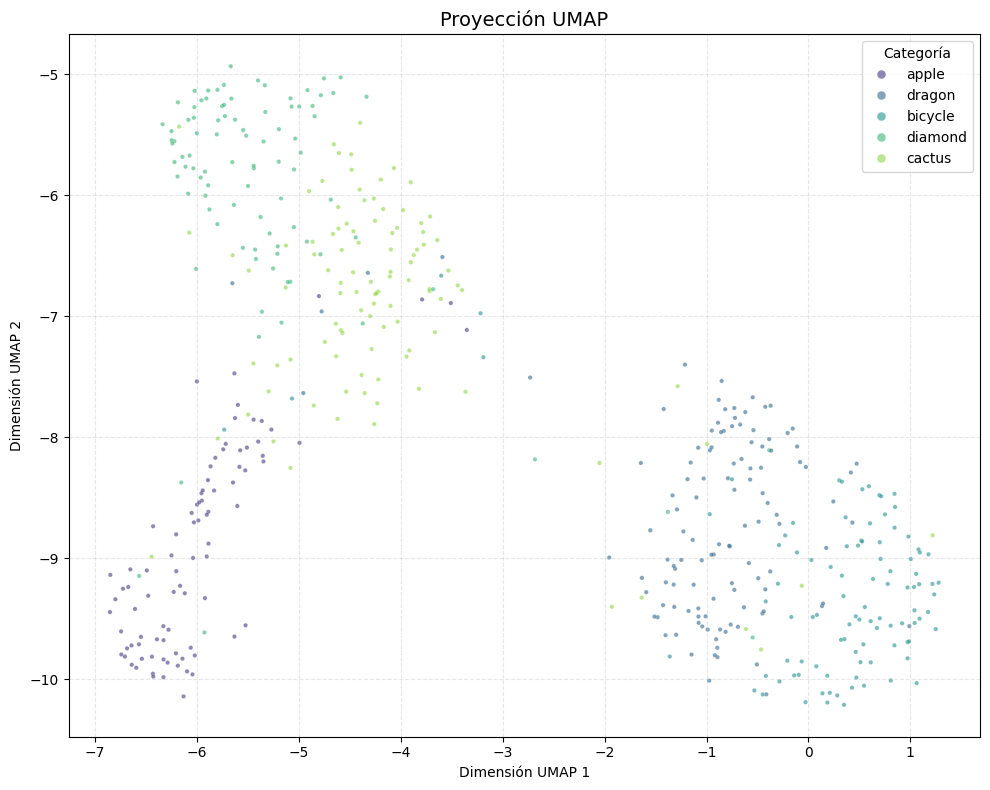

In [20]:
eda.visualize_umap_projection(df_clean, n_samples=500)

Como sabemos que la base de datos tiene algunos dibujos que están prácticamente vacíos, vamos a proceder a intentar eliminar los que tienen poca tinta, mostrando un heatmap de los dibujos

In [21]:
eda.data_resume_info(df=df_clean)

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
Index: 24750 entries, 0 to 24999
Columns: 679 entries, id to px_754
dtypes: int64(2), object(1), uint8(676)
memory usage: 16.7+ MB

--- Valores Nulos ---
id            0
category      0
recognized    0
px_29         0
px_30         0
             ..
px_750        0
px_751        0
px_752        0
px_753        0
px_754        0
Length: 679, dtype: int64

--- Filas Duplicadas ---
Total: 0

--- Estadisticas Descriptivas ---


,id,category,recognized,px_29,px_30,px_31,px_32,px_33,px_34,px_35,...,px_745,px_746,px_747,px_748,px_749,px_750,px_751,px_752,px_753,px_754
count,24750.000000,24750,24750.0,24750.000000,24750.000000,24750.000000,24750.000000,24750.000000,24750.000000,24750.000000,...,24750.000000,24750.000000,24750.000000,24750.00000,24750.000000,24750.000000,24750.00000,24750.000000,24750.000000,24750.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,bicycle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12462.634788,NaN,1.0,0.009535,0.143677,0.341535,0.635030,1.021616,1.438101,2.032646,...,9.007515,6.091838,3.793697,2.21899,1.243111,0.640364,0.35600,0.155111,0.056727,0.003394
std,7198.155413,NaN,0.0,0.366026,3.211000,5.200618,7.171953,9.123952,10.740799,12.845111,...,26.690849,22.130502,17.487961,13.27684,9.975594,7.096074,5.31956,3.301658,2.116666,0.202385
min,1.000000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6234.250000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,12454.500000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,18666.750000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


# xgboost

In [22]:
X_train, X_test, y_train, y_test, le = xgbm.split_df(df=df_clean)

In [23]:
xgbm.train_model(X_train, y_train, X_test, y_test)

Early stopping alcanzado en iteración: 399
Train Accuracy: 0.993030303030303
Test Accuracy: 0.9280808080808081

Reporte (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       995
           1       0.94      0.95      0.94       998
           2       0.91      0.93      0.92       993
           3       0.96      0.91      0.94       972
           4       0.86      0.89      0.87       992

    accuracy                           0.93      4950
   macro avg       0.93      0.93      0.93      4950
weighted avg       0.93      0.93      0.93      4950



(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, early_stopping_rounds=30,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=5, missing=nan,
               monotone_constraints=None, n_estimators=400, n_jobs=None,
               num_class=5, num_parallel_tree=None, objective='multi:softprob', ...),
 array([3, 3, 4, ..., 0, 0, 0], shape=(19800,)),
 array([1, 4, 3, ..., 4, 1, 4], shape=(4950,)),
 399)

In [25]:
X_train, X_test, y_train, y_test, le= xgbm.split_df(df_clean)

# Crear estudio
study = optuna.create_study(direction="maximize")

# Optimizar usando lambda para pasar los datos
study.optimize(
    lambda trial: xgbm.objective(trial, X_train, y_train, X_test, y_test),
    n_trials=50
)

# Ver resultados
print("Mejores parámetros:", study.best_params)
print("Mejor Accuracy:", study.best_value)

[I 2026-02-16 14:50:31,853] A new study created in memory with name: no-name-966eeedc-c640-499b-afe9-6ed08c2f725f
[I 2026-02-16 14:50:48,253] Trial 0 finished with value: 0.9014141414141414 and parameters: {'n_estimators': 219, 'max_depth': 4, 'learning_rate': 0.046010074475867836, 'subsample': 0.790048829739471, 'colsample_bytree': 0.6902578921154402, 'min_child_weight': 3, 'gamma': 4.037258197479885, 'reg_alpha': 2.0469667897894617, 'reg_lambda': 0.7511162098468349}. Best is trial 0 with value: 0.9014141414141414.
[I 2026-02-16 14:51:04,180] Trial 1 finished with value: 0.9226262626262626 and parameters: {'n_estimators': 260, 'max_depth': 4, 'learning_rate': 0.1391192323184737, 'subsample': 0.5534747711064903, 'colsample_bytree': 0.5525823778467724, 'min_child_weight': 1, 'gamma': 1.2679697709850313, 'reg_alpha': 4.726830611848977, 'reg_lambda': 0.45783219541382314}. Best is trial 1 with value: 0.9226262626262626.
[I 2026-02-16 14:51:45,862] Trial 2 finished with value: 0.92080808080

Mejores parámetros: {'n_estimators': 787, 'max_depth': 5, 'learning_rate': 0.05698318133658996, 'subsample': 0.8288229698693163, 'colsample_bytree': 0.8594666633584788, 'min_child_weight': 4, 'gamma': 0.03536031251353685, 'reg_alpha': 2.612891283090261, 'reg_lambda': 0.9662506128776445}
Mejor Accuracy: 0.9347474747474748


In [45]:
best_params = study.best_params
params_df = pd.DataFrame(list(best_params.items()), columns=["Hiperparámetro", "Valor"])
display(params_df)

,Hiperparámetro,Valor
0,n_estimators,787.000000
1,max_depth,5.000000
2,learning_rate,0.056983
3,subsample,0.828823
4,colsample_bytree,0.859467
5,min_child_weight,4.000000
6,gamma,0.035360
7,reg_alpha,2.612891
8,reg_lambda,0.966251


In [39]:
opt_model, y_pred_train_opt, y_pred_test_opt, best_iter_opt = xgbm.train_model(
    X_train,
    y_train,
    X_test,
    y_test,
    **best_params
)



Early stopping alcanzado en iteración: 786
Train Accuracy: 0.99989898989899
Test Accuracy: 0.9347474747474748

Reporte (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       995
           1       0.94      0.96      0.95       998
           2       0.92      0.94      0.93       993
           3       0.96      0.92      0.94       972
           4       0.88      0.89      0.88       992

    accuracy                           0.93      4950
   macro avg       0.94      0.93      0.93      4950
weighted avg       0.94      0.93      0.93      4950



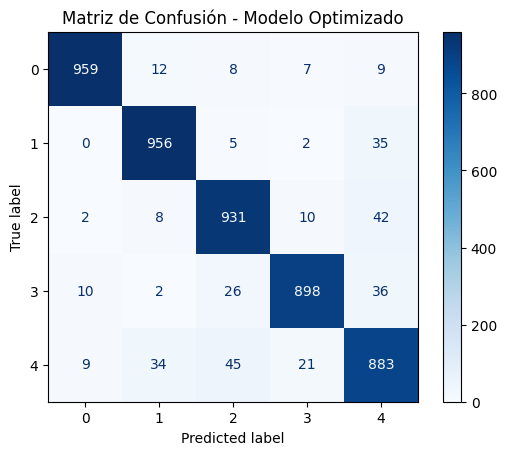

In [42]:
cm = confusion_matrix(y_test, y_pred_test_opt)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.show()
